# Análisis Exploratorio de Datos:

## Preparación y limpieza inicial de los datos

Se cargó el dataset US_Accidents_March23.csv y se realizó la conversión de las variables temporales (`Start_Time`, `End_Time` y `Weather_Timestamp`) al formato de fecha y hora.

Esta transformación es fundamental para permitir un análisis adecuado de la duración de los accidentes, su distribución a lo largo del tiempo y su posible relación con las condiciones climáticas registradas.

Los valores que no pudieron convertirse correctamente al formato temporal fueron tratados como valores nulos, garantizando así la consistencia del conjunto de datos para los análisis posteriores.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Cargar dataset
df = pd.read_csv('US_Accidents_March23.csv')
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='mixed', errors='coerce')
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], format='mixed', errors='coerce')
df[['Start_Time', 'End_Time', 'Weather_Timestamp']].dtypes



Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Weather_Timestamp    datetime64[ns]
dtype: object

## Análisis descriptivo de variables numéricas

El conjunto de datos analizado contiene más de **7.7 millones de registros**, lo que proporciona una base sólida para el análisis estadístico de los accidentes de tráfico en Estados Unidos.

### Severidad de los accidentes
La severidad promedio de los accidentes es de **2.21**, con una mediana de 2, lo que indica que predominan los accidentes de gravedad moderada. La  desviación estándar es de 0,49 aproximadamente, lo cual sugiere una variablidad baja, o sea, existe una concentración considerable de los registros en niveles intermedios de severidad, con una presencia pequeña de eventos extremos.

### Distancia afectada
La distancia media afectada por los accidentes es de 0.56 millas; sin embargo, la mediana de apenas 0.03 millas indica que la mayoría de los eventos impacta tramos muy cortos de la vía. Esta diferencia significativa entre la media y la mediana evidencia una distribución asimétrica hacia la derecha, donde un número reducido de accidentes con distancias muy elevadas incrementa el valor promedio.

Asimismo, la desviación estándar (1.78 millas) es considerablemente mayor que la media, lo que refleja una alta dispersión de los datos. Esta variabilidad se ve reforzada por la presencia de valores máximos que superan las 400 millas, los cuales se alejan notablemente del patrón general y pueden considerarse valores atípicos (outliers). Estos casos extremos deberán analizarse con mayor detalle o tratarse de forma específica en etapas posteriores del análisis.


### Variables climáticas
Las variables meteorológicas muestran una notable variabilidad:

- La **temperatura** presenta un valor medio de **61.7 °F**, con un rango amplio que refleja la diversidad climática de las regiones analizadas.
- La **humedad relativa** tiene una media del **64.8 %**, indicando condiciones mayormente húmedas durante los eventos registrados.
- La **presión atmosférica** exhibe una variabilidad reducida alrededor de valores normales, lo que sugiere condiciones relativamente estables en la mayoría de los casos.

### Visibilidad y sensación térmica
La **visibilidad** media es de aproximadamente **9 millas**, aunque se observan valores mínimos cercanos a cero, lo que podría estar asociado a condiciones meteorológicas adversas como niebla o precipitaciones intensas.

Por su parte, el índice de **sensación térmica (Wind Chill)** muestra un comportamiento similar al de la temperatura, con una mayor dispersión y la presencia de valores extremos, lo que sugiere la influencia de factores adicionales como el viento en la percepción térmica durante los accidentes.

### Consideraciones iniciales
Finalmente, se observa que algunas variables presentan un número significativo de valores faltantes, especialmente en el índice de sensación térmica, lo cual deberá tenerse en cuenta en las etapas posteriores de análisis y modelado.


In [39]:
vars_numericas = [
    'Severity',
    'Distance(mi)',
    'Temperature(F)',
    'Humidity(%)',
    'Pressure(in)',
    'Visibility(mi)',
    'Wind_Chill(F)'
]
df[vars_numericas].describe()

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Chill(F)
count,7.728394e+06,7.728394e+06,7.564541e+06,7.554250e+06,7.587715e+06,7.551296e+06,5.729375e+06
mean,2.212384e+00,5.618423e-01,6.166329e+01,6.483104e+01,2.953899e+01,9.090376e+00,5.825105e+01
std,4.875313e-01,1.776811e+00,1.901365e+01,2.282097e+01,1.006190e+00,2.688316e+00,2.238983e+01
min,1.000000e+00,0.000000e+00,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,-8.900000e+01
25%,2.000000e+00,0.000000e+00,4.900000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.300000e+01
50%,2.000000e+00,3.000000e-02,6.400000e+01,6.700000e+01,2.986000e+01,1.000000e+01,6.200000e+01
75%,2.000000e+00,4.640000e-01,7.600000e+01,8.400000e+01,3.003000e+01,1.000000e+01,7.500000e+01
max,4.000000e+00,4.417500e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,2.070000e+02


## Correlaciones entre variables numéricas

Se calculó la matriz de correlación entre las variables numéricas y se representó mediante un mapa de calor, lo que permite identificar relaciones lineales y posibles dependencias entre las variables.

### Relación entre variables climáticas

- La **temperatura** y la **sensación térmica (Wind_Chill)** presentan una correlación extremadamente alta (**r = 0.99**), lo que era esperado dado que la sensación térmica depende directamente de la temperatura y del viento.
- La **humedad relativa** muestra correlaciones negativas moderadas con **visibilidad (r = -0.38)**, **temperatura (r = -0.33)** y **sensación térmica (r = -0.31)**. Esto indica que un aumento de la humedad suele asociarse con menor visibilidad y una percepción ligeramente más fría.

### Relación de la severidad con otras variables

La severidad de los accidentes muestra **correlaciones muy bajas o prácticamente nulas** con las variables numéricas analizadas.

Estos resultados indican que, dentro de este conjunto de datos, la gravedad de los accidentes no depende directamente de las condiciones climáticas ni de la extensión de la distancia afectada, sugiriendo que otros factores —no incluidos en este subconjunto de variables— podrían ser más determinantes para explicar la severidad.

Este mapa de calor es útil para visualizar patrones, detectar redundancias y orientar análisis futuros, como modelos predictivos o estudios de regresión.



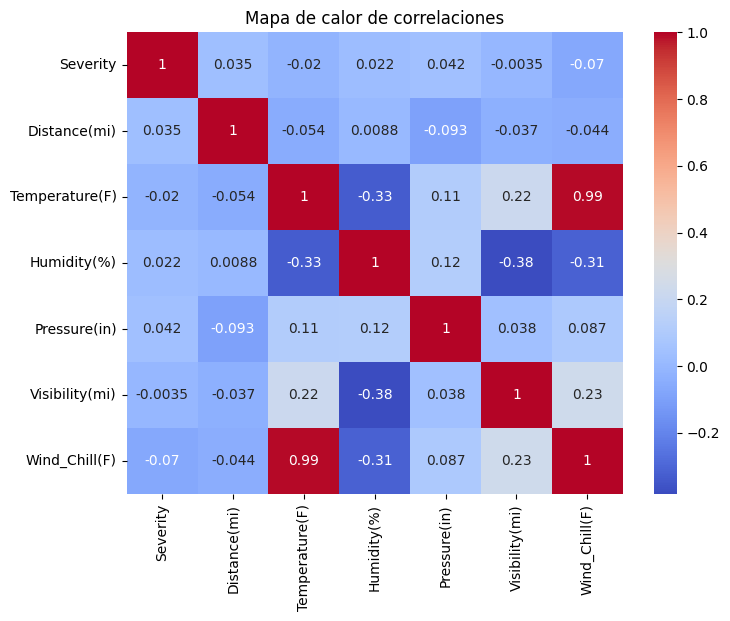

In [15]:
corr = df[vars_numericas].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()


In [8]:
df['Severity'].value_counts(normalize=True) * 100

Severity
2    79.667017
3    16.812510
4     2.648804
1     0.871669
Name: proportion, dtype: float64

## Distribución de la severidad de los accidentes

El análisis de la proporción de accidentes por nivel de severidad muestra que la gran mayoría de los eventos se concentra en el **nivel 2**, representando aproximadamente **79.7 %** del total. Los accidentes de severidad intermedia dominan claramente el dataset, mientras que los accidentes graves (nivel 3) constituyen solo el **16.8 %**, los muy graves (nivel 4) apenas el **2.6 %**, y los leves (nivel 1) menos del **1 %**.

Esta concentración se refleja también en los estadísticos descriptivos:  
- La **mediana** de severidad es 2, indicando que la mitad de los accidentes se sitúa en este nivel.  
- La **desviación estándar**, relativamente baja (≈ 0.49), evidencia que los valores de severidad están poco dispersos y se mantienen principalmente en torno al nivel intermedio.

En conjunto, estos resultados muestran que la severidad de los accidentes tiende a ser moderada, con pocos casos extremos hacia niveles muy leves o muy graves, lo que refuerza la observación de que la distribución está altamente sesgada hacia el nivel 2.


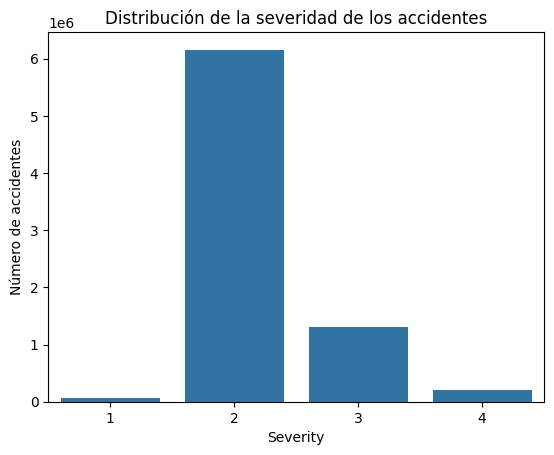

In [7]:
sns.countplot(x='Severity', data=df, order=[1,2,3,4])
plt.title('Distribución de la severidad de los accidentes')
plt.ylabel('Número de accidentes')
plt.show()



## Observaciones sobre la distancia de los accidentes

El histograma de la variable Distance(mi) muestra una distribución extremadamente concentrada cerca del origen, lo que dificulta la visualización de la dispersión real de los datos. Por esta razón, el boxplot resulta una herramienta complementaria esencial para analizar esta variable.

**Hallazgos del boxplot:**
  - Caja comprimida cerca de cero: Confirma visualmente que la mayoría de los accidentes afectan distancias muy cortas, respaldando los estadísticos descriptivos calculados anteriormente.

  - Gran cantidad de outliers: Se observan numerosos valores atípicos que se extienden hasta más de 400 millas. Estos casos podrían representar:

    - Errores de registro en los datos
    - Accidentes en cadena o cierres prolongados de autopistas
    - Incidentes que afectaron rutas completas

**Interpretación práctica:**
La mayoría de los accidentes son eventos localizados que afectan tramos cortos de la vía, típicamente el área inmediata del impacto. Los casos con distancias muy elevadas son excepcionales y deberían investigarse individualmente o considerarse para tratamiento de outliers en análisis predictivos.


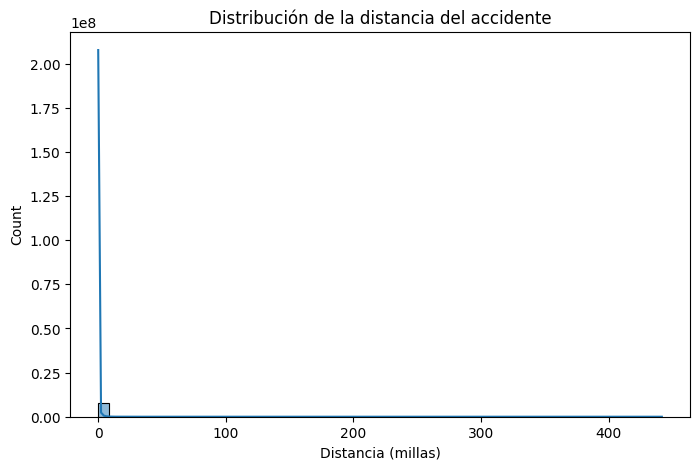

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['Distance(mi)'], bins=50, kde=True)
plt.title('Distribución de la distancia del accidente')
plt.xlabel('Distancia (millas)')
plt.show()


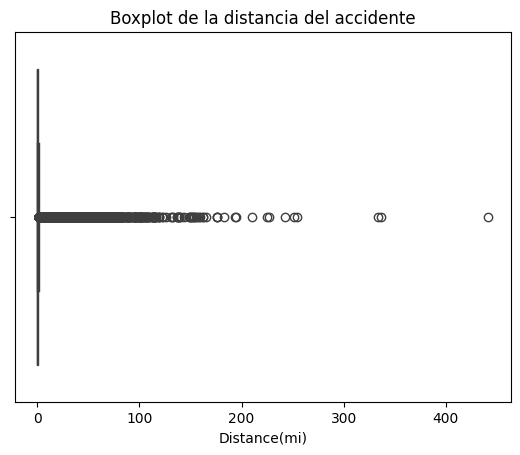

In [6]:
sns.boxplot(x=df['Distance(mi)'])
plt.title('Boxplot de la distancia del accidente')
plt.show()


## Relación entre distancia y severidad

El diagrama de dispersión entre Distance(mi) y Severity no muestra un patrón claro de asociación entre ambas variables. Los puntos se distribuyen de forma uniforme en cada nivel de severidad, sin evidenciar que accidentes más graves afecten distancias mayores o viceversa.

Esta observación es consistente con la correlación prácticamente nula identificada previamente en el mapa de calor, confirmando que la extensión del tramo afectado no es un factor determinante de la gravedad del accidente.

Cabe destacar que la mayor densidad de puntos se concentra en distancias cortas y severidad 2, reflejando las distribuciones individuales de cada variable ya analizadas.

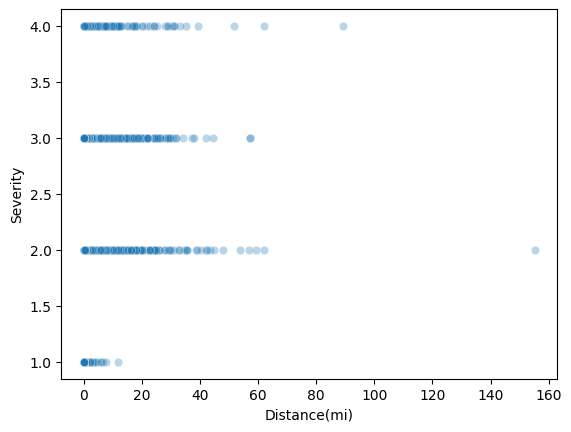

In [12]:
sns.scatterplot(
    data=df.sample(100_000),
    x='Distance(mi)',
    y='Severity',
    alpha=0.3
)
plt.show()

## Análisis de las condiciones climatológicas y la severidad de los accidentes 

**Distribución de la temperatura:**
El histograma de Temperature(F) muestra una distribución aproximadamente unimodal con ligera asimetría hacia la izquierda. La mayor concentración de accidentes ocurre en temperaturas entre 50°F y 80°F, lo que corresponde a condiciones climáticas moderadas. Se observan colas en ambos extremos, indicando que también se registran accidentes en condiciones de frío y calor intensos, aunque con menor frecuencia.


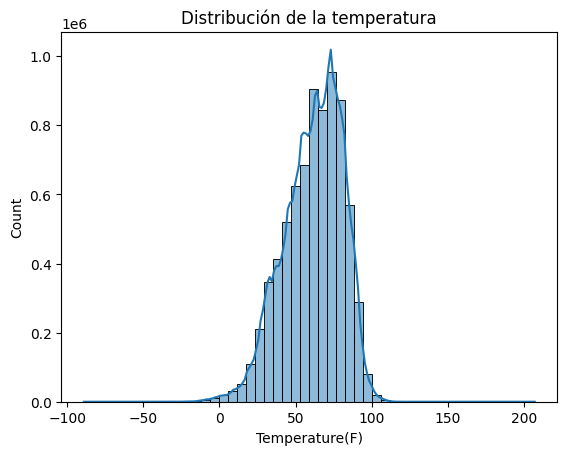

In [11]:
sns.histplot(df['Temperature(F)'], bins=50, kde=True)
plt.title('Distribución de la temperatura')
plt.show()


**Relación entre temperatura y severidad:**
El diagrama de dispersión entre temperatura y severidad no revela un patrón de asociación claro. Los puntos se distribuyen de manera uniforme a lo largo de todo el rango de temperaturas para cada nivel de severidad, lo que sugiere que la temperatura por sí sola no es un factor determinante de la gravedad de los accidentes.

Esta observación es coherente con la correlación cercana a cero identificada en el mapa de calor.

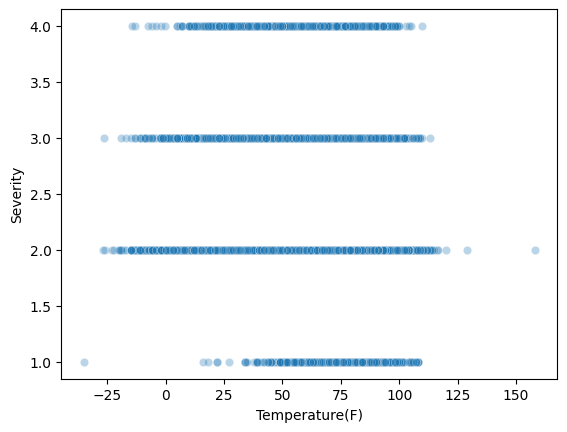

In [9]:
sns.scatterplot(
    data=df.sample(100_000),
    x='Temperature(F)',
    y='Severity',
    alpha=0.3
)
plt.show()


**Severidad según condición climática:**
El boxplot de severidad por las 8 condiciones climáticas más frecuentes muestra que la mediana de severidad se mantiene en nivel 2 para todas las condiciones. No se observan diferencias sustanciales entre condiciones como "Fair", "Cloudy", "Rain" u otras, lo que indica que el tipo de clima registrado no discrimina significativamente la gravedad del accidente.



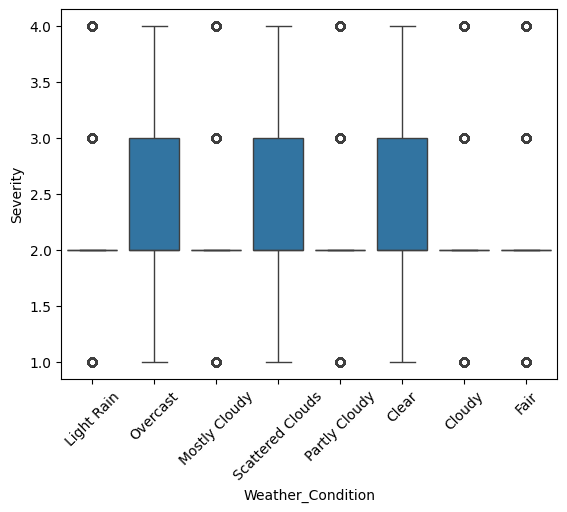

In [30]:
top_weather = df['Weather_Condition'].value_counts().head(8).index

sns.boxplot(
    data=df[df['Weather_Condition'].isin(top_weather)],
    x='Weather_Condition',
    y='Severity'
)
plt.xticks(rotation=45)
plt.show()


**Severidad y precipitación:**
El boxplot de precipitación por severidad (con escala logarítmica) tampoco evidencia una relación clara. Las distribuciones de precipitación son similares entre los distintos niveles de severidad, sugiriendo que la cantidad de lluvia no está asociada directamente con accidentes más graves.

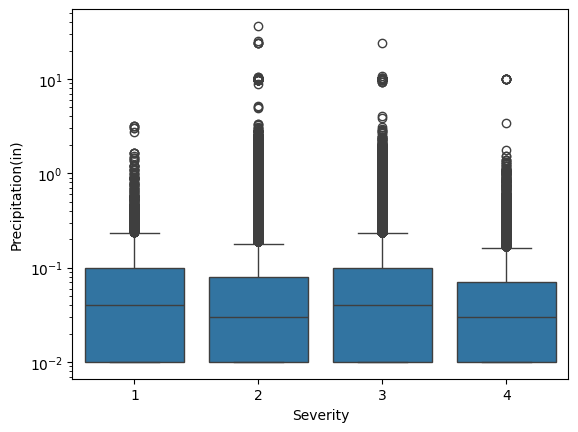

In [31]:
sns.boxplot(
    data=df[df['Precipitation(in)'] > 0],
    x='Severity',
    y='Precipitation(in)'
)
plt.yscale('log')
plt.show()


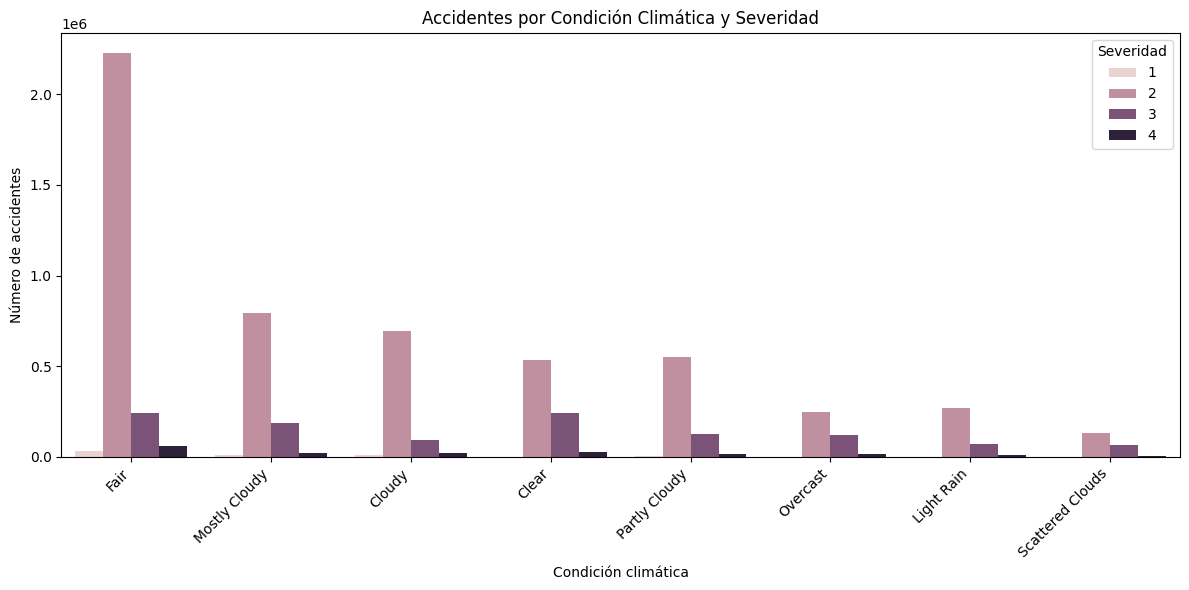

In [44]:
# Distribución de accidentes por condición climática y severidad
top_weather_conditions = df['Weather_Condition'].value_counts().head(8).index

plt.figure(figsize=(12,6))
sns.countplot(
    data=df[df['Weather_Condition'].isin(top_weather_conditions)],
    x='Weather_Condition',
    hue='Severity',
    order=top_weather_conditions
)
plt.title('Accidentes por Condición Climática y Severidad')
plt.xlabel('Condición climática')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Severidad')
plt.tight_layout()
plt.show()

## Análisis temporal por año

El análisis temporal revela que el año 2022 presenta el mayor número de accidentes registrados, con un total de 1,762,452 casos, mostrando una tendencia creciente desde 2016. Si bien 2023 presenta un número menor de accidentes, esto se debe a que el conjunto de datos solo contiene información parcial de dicho año.


In [14]:
df['Year'] = df['Start_Time'].dt.year
df['Year'].value_counts().sort_index()


Year
2016     410821
2017     718093
2018     893426
2019     954303
2020    1178913
2021    1563753
2022    1762452
2023     246633
Name: count, dtype: int64

**Severidad promedio por año:**
El gráfico de líneas de severidad promedio muestra fluctuaciones relativamente pequeñas a lo largo de los años, manteniéndose siempre cercana al nivel 2. Esto indica que, a pesar del incremento en el volumen de accidentes, la gravedad promedio de los mismos se ha mantenido estable en el tiempo.

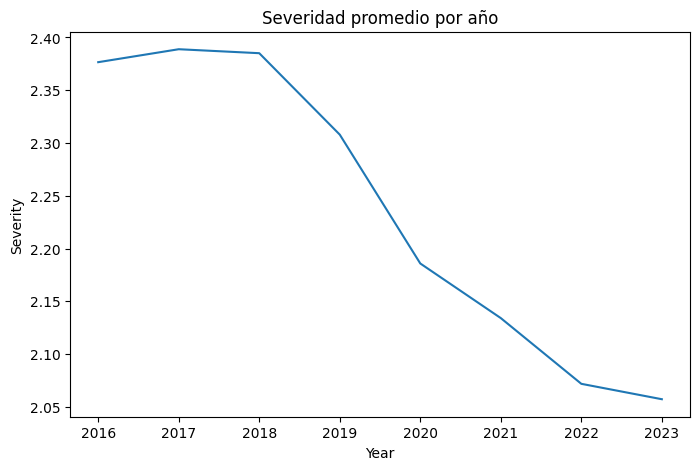

In [16]:
plt.figure(figsize=(8,5))
sns.lineplot(
    data=df,
    x='Year',
    y='Severity',
    estimator='mean',
    errorbar=None
)
plt.title('Severidad promedio por año')
plt.show()


**Conteo de accidentes por severidad y año:**

El gráfico de barras apiladas muestra que:
 - El nivel 2 domina consistentemente en todos los años, representando la mayor proporción de accidentes.
 - El incremento en el número total de accidentes se refleja principalmente en el aumento de casos de severidad 2.
 - Los accidentes de severidad 3 y 4 también aumentan en números absolutos, pero mantienen su proporción relativa.

**Interpretación general:**

El crecimiento sostenido en el número de accidentes podría atribuirse a:
 - Mayor volumen de tráfico vehicular
 - Mejoras en los sistemas de reporte y registro de incidentes
 - Expansión de la cobertura geográfica del dataset


Sin embargo, la estabilidad en la severidad promedio sugiere que las condiciones de seguridad vial no han empeorado proporcionalmente al aumento de accidentes.


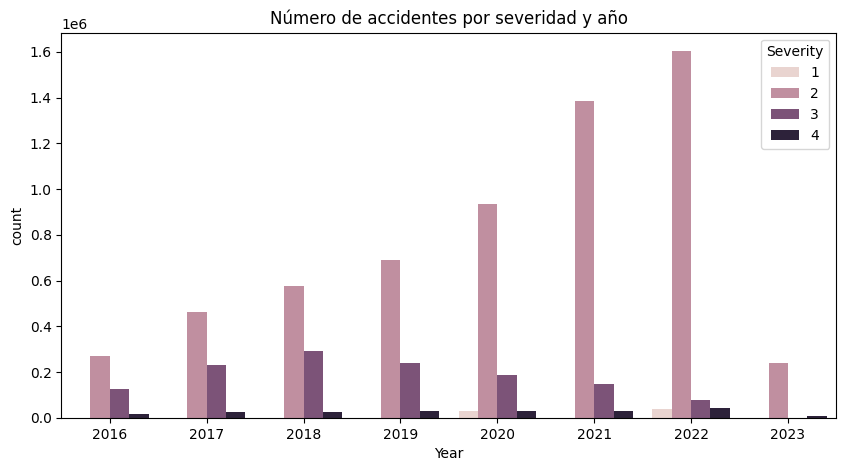

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x='Year',
    hue='Severity'
)
plt.title('Número de accidentes por severidad y año')
plt.show()


## Análisis temporal por mes:

**Distribución de accidentes por mes:**

El conteo de accidentes por mes muestra una distribución relativamente uniforme a lo largo del año, aunque se observan algunas variaciones. Los meses con mayor número de accidentes tienden a ser enero, noviembre y diciembre, mientras que los meses de verano presentan valores ligeramente menores.

In [15]:
df['Month'] = df['Start_Time'].dt.month
df['Month'].value_counts().sort_index()


Month
1     751946
2     658984
3     554595
4     587300
5     558176
6     571373
7     512335
8     599666
9     651381
10    675130
11    760165
12    847343
Name: count, dtype: int64

**Severidad promedio por mes:**

El gráfico de líneas de severidad promedio por mes muestra fluctuaciones mínimas, manteniéndose siempre cercana al nivel 2. Se observa una ligera tendencia a mayor severidad en los meses de verano (junio-agosto), aunque las diferencias son marginales y no representan un cambio significativo en el patrón general.

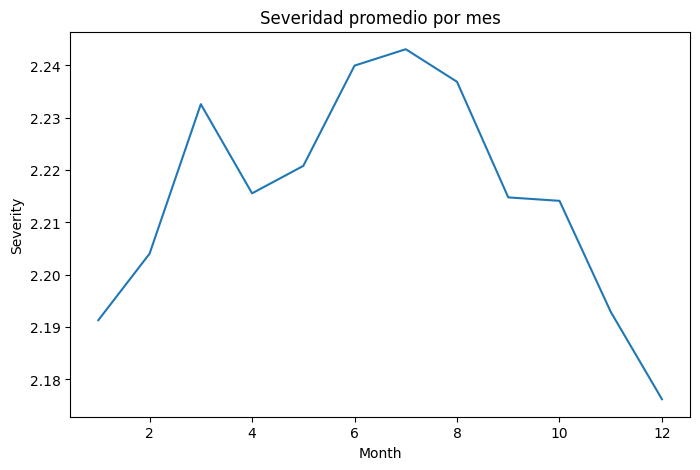

In [26]:
plt.figure(figsize=(8,5))
sns.lineplot(
    data=df,
    x='Month',
    y='Severity',
    estimator='mean',
    errorbar=None
)
plt.title('Severidad promedio por mes')
plt.show()


**Distribución de severidad por mes:**

El countplot confirma que:

- La severidad 2 domina en todos los meses del año, manteniendo proporciones similares.
- Los meses de otoño e invierno (octubre a enero) presentan mayor volumen total de accidentes.
- La proporción entre niveles de severidad se mantiene estable independientemente del mes.

**Interpretación:**

La mayor frecuencia de accidentes en los últimos meses del año podría estar asociada a:

- Mayor actividad vehicular por festividades (Thanksgiving, Navidad)
- Reducción de horas de luz diurna

Sin embargo, el hecho de que la severidad promedio no aumente significativamente sugiere que, aunque ocurren más accidentes, estos no son necesariamente más graves durante estos períodos.


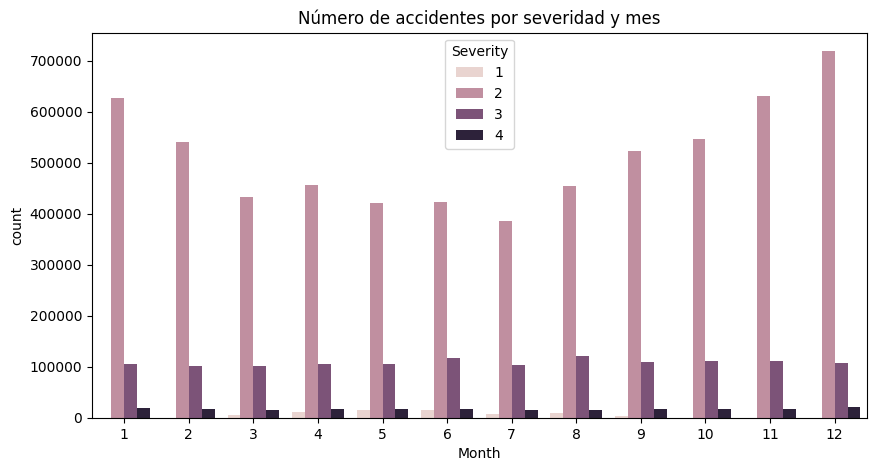

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x='Month',
    hue='Severity'
)
plt.title('Número de accidentes por severidad y mes')
plt.show()

## Análisis temporal por hora del día

**Distribución de accidentes por hora:**

El conteo de accidentes por hora revela un patrón claramente asociado a los ciclos de actividad vehicular diaria. Se identifican dos picos principales:

 - Pico matutino (6:00 - 9:00): Corresponde a las horas de desplazamiento hacia el trabajo y escuelas.
 - Pico vespertino (15:00 - 18:00): Coincide con el regreso a casa y la salida de actividades laborales.
 
Las horas con menor frecuencia de accidentes son las de la madrugada (0:00 - 5:00), cuando el volumen de tráfico es significativamente menor.

In [16]:
df['Hour'] = df['Start_Time'].dt.hour
df['Hour'].value_counts().sort_index()

Hour
0     112378
1      97071
2      93227
3      83863
4     159852
5     228182
6     405837
7     587472
8     577576
9     363034
10    342706
11    355040
12    355001
13    396445
14    448846
15    525855
16    581969
17    576015
18    432042
19    295121
20    225226
21    191452
22    167645
23    126539
Name: count, dtype: int64

**Severidad promedio por hora:**

El gráfico de líneas muestra un patrón interesante: la severidad promedio es ligeramente mayor durante las horas nocturnas y de madrugada (aproximadamente entre las 0:00 y las 5:00), aunque las diferencias son pequeñas. Esto podría estar asociado a:

 - Menor visibilidad durante la noche
 - Mayor probabilidad de conducción bajo efectos del alcohol
 - Velocidades más altas por menor congestión
 - Menor tiempo de reacción por fatiga

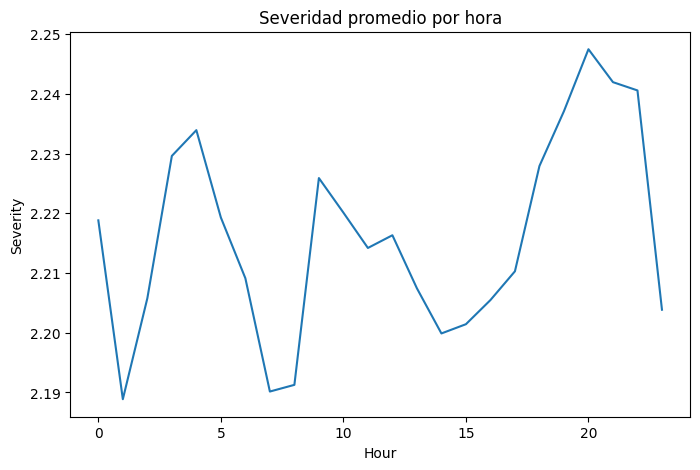

In [25]:
plt.figure(figsize=(8,5))
sns.lineplot(
    data=df,
    x='Hour',
    y='Severity',
    estimator='mean',
    errorbar=None
)
plt.title('Severidad promedio por hora')
plt.show()


**Distribución de severidad por hora:**


El countplot confirma que:

 - La severidad 2 domina en todas las horas, manteniendo el patrón general del dataset.
 - Los picos de accidentes coinciden con las horas pico de tráfico (7-8 AM y 4-5 PM).
 - Durante la madrugada, aunque hay menos accidentes en términos absolutos, la proporción de accidentes de severidad 3 y 4 parece ligeramente mayor en relación al total de esa franja horaria.

**Interpretación**

La distribución horaria de accidentes refleja directamente los patrones de movilidad urbana: a mayor volumen de vehículos en circulación, mayor probabilidad de incidentes. Sin embargo, el ligero aumento en la severidad promedio durante horas nocturnas sugiere que, aunque ocurren menos accidentes, estos tienden a ser marginalmente más graves, posiblemente debido a factores como la velocidad, la visibilidad reducida o el estado del conductor.

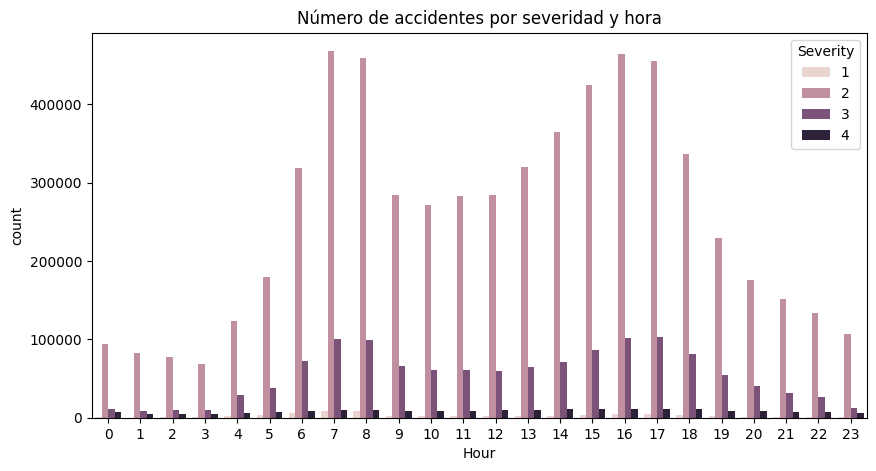

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x='Hour',
    hue='Severity'
)
plt.title('Número de accidentes por severidad y hora')
plt.show()


## Visibilidad y severidad:
El boxplot muestra que la visibilidad no discrimina la gravedad de los accidentes. La mediana se mantiene cercana a 10 millas para todos los niveles de severidad, y las distribuciones son prácticamente idénticas. Esto es consistente con la baja correlación identificada previamente y sugiere que los conductores podrían compensar las condiciones de baja visibilidad con mayor precaución.

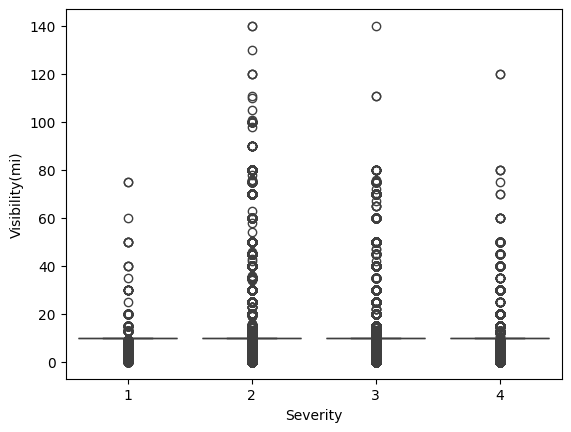

In [27]:
sns.boxplot(data=df, x='Severity', y='Visibility(mi)')
plt.show()


## Análisis de Accidentes por Estado:
En principio se muestran los 10 estados con más accidentes registrados. California (CA), Florida (FL) y Texas (TX) suelen liderar esta lista debido a su alta densidad poblacional y volumen de tráfico.


In [17]:
df['State'].value_counts().head(10)


State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
Name: count, dtype: int64

In [12]:
df.groupby('State')['Severity'].mean().sort_values(ascending=False).head(10)


State
GA    2.506931
WI    2.473939
RI    2.458252
KY    2.454176
CO    2.443902
SD    2.442907
VT    2.425486
IA    2.419432
MO    2.399609
IN    2.398072
Name: Severity, dtype: float64

In [18]:
tabla_year_state_sev = (
    df
    .groupby(['Year', 'State', 'Severity'])
    .size()
    .reset_index(name='Accidents')
)
top_states = (
    df['State']
    .value_counts()
    .head(5)
    .index
)

tabla_filtrada = tabla_year_state_sev[
    tabla_year_state_sev['State'].isin(top_states)
]



Se podría rellenar cualquier estado deseado para saber las características específicas de este.

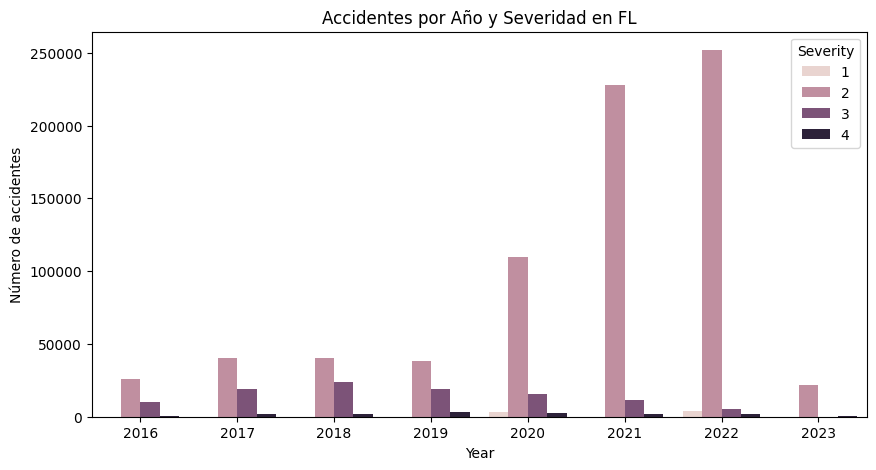

In [19]:
estado = 'FL'

data_estado = tabla_filtrada[tabla_filtrada['State'] == estado]

plt.figure(figsize=(10,5))
sns.barplot(
    data=data_estado,
    x='Year',
    y='Accidents',
    hue='Severity'
)
plt.title(f'Accidentes por Año y Severidad en {estado}')
plt.ylabel('Número de accidentes')
plt.show()


### Análisis Geográfico por Estado:

### Estados con mayor volumen de accidentes
Los 5 estados con mayor número de accidentes registrados concentran una proporción significativa del total nacional. Esto se correlaciona con:
- Mayor población y densidad vehicular
- Extensas redes de autopistas
- Condiciones climáticas variables (especialmente en estados como FL y TX)

### Evolución temporal por estado
El gráfico de facetas muestra la evolución de accidentes por año y severidad para cada uno de los 5 estados principales. Se observa que:
- Todos los estados muestran una tendencia creciente en el número de accidentes hasta 2022
- La severidad 2 predomina consistentemente en todos los estados
- Algunos estados como California muestran picos más pronunciados en ciertos años

### Comparación de severidad entre estados
La severidad promedio varía entre estados, lo que podría estar asociado a:
- Diferencias en infraestructura vial
- Normativas de tráfico estatales
- Condiciones climáticas predominantes
- Patrones de conducción regionales

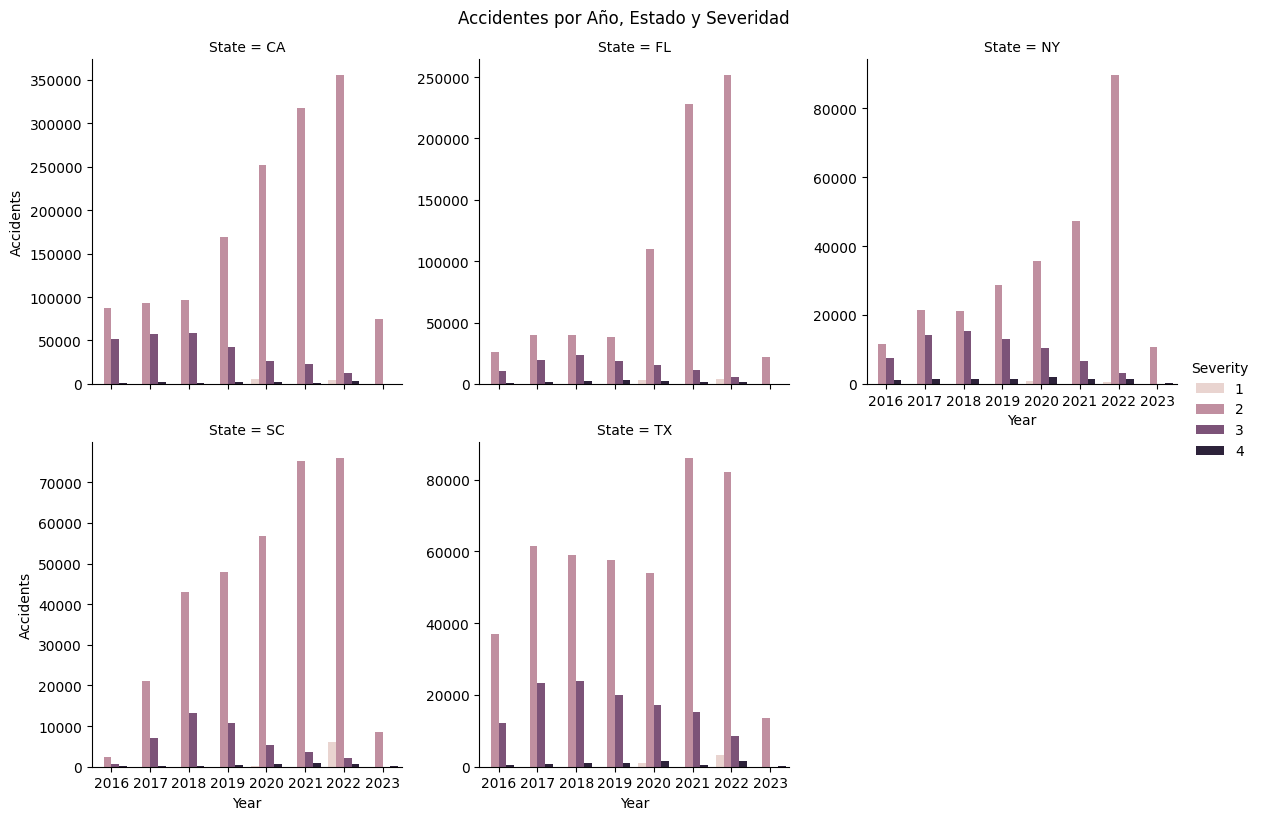

In [42]:
g = sns.catplot(
    data=tabla_filtrada,
    x='Year',
    y='Accidents',
    hue='Severity',
    col='State',
    kind='bar',
    col_wrap=3,
    height=4,
    sharey=False
)

g.fig.suptitle('Accidentes por Año, Estado y Severidad', y=1.02)
plt.show()


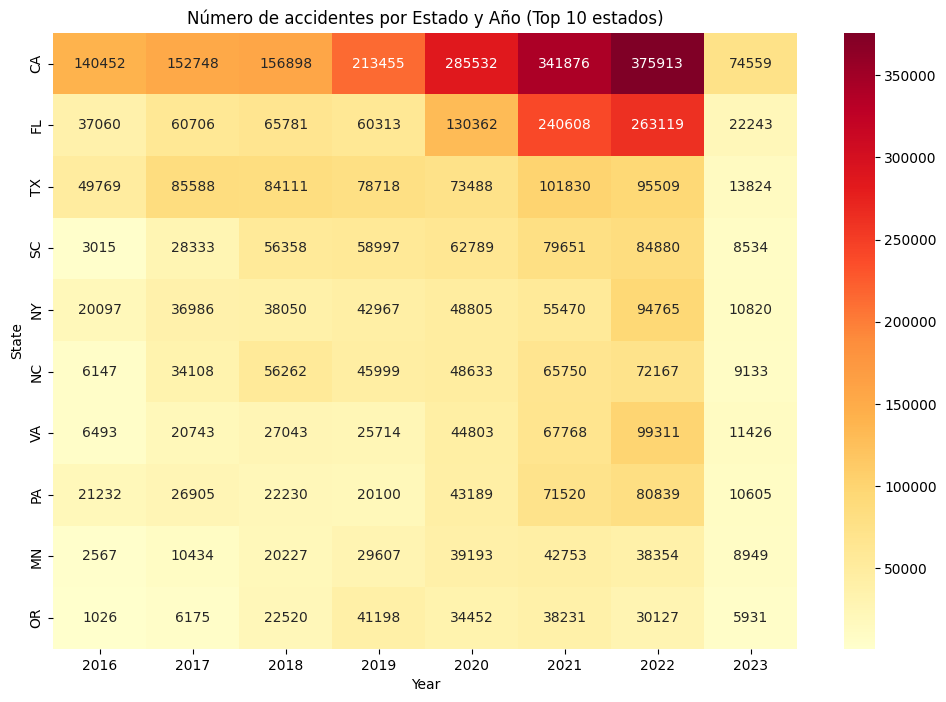

In [ ]:
pivot_state_year = df.groupby(['State', 'Year']).size().unstack(fill_value=0)
top_10_states = df['State'].value_counts().head(10).index
pivot_filtrado = pivot_state_year.loc[top_10_states]

plt.figure(figsize=(12,8))
sns.heatmap(pivot_filtrado, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Número de accidentes por Estado y Año (Top 10 estados)')
plt.show()

**Observaciones principales:**

 - La severidad promedio se mantiene cercana al nivel 2 en todos los estados, consistente con el patrón general del dataset.
 - Sin embargo, existen variaciones notables: algunos estados muestran severidad promedio ligeramente superior (más cerca de 2.3-2.4) mientras otros están más cerca de 2.0.
 - No hay una correlación directa entre el volumen de accidentes y la severidad promedio. Por ejemplo, California tiene muchos accidentes pero no necesariamente la mayor severidad promedio.

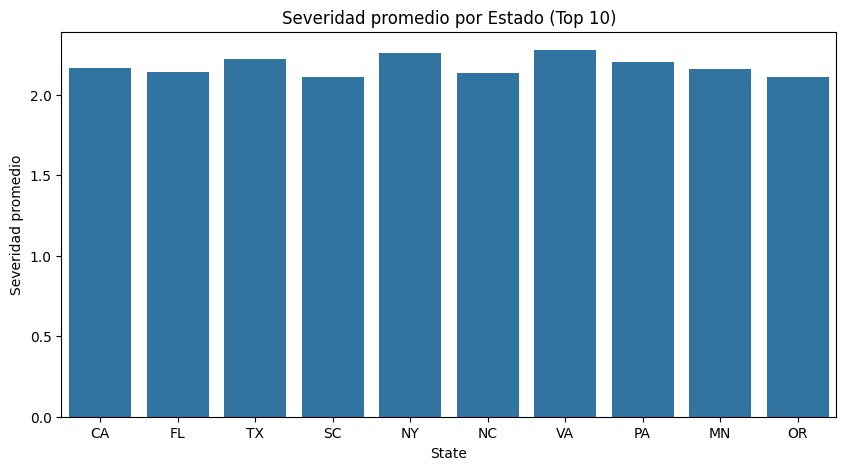

In [22]:

top_10 = df['State'].value_counts().head(10).index
plt.figure(figsize=(10,5))
sns.barplot(
    data=df[df['State'].isin(top_10)],
    x='State',
    y='Severity',
    order=top_10,
    estimator='mean',
    errorbar=None
)
plt.title('Severidad promedio por Estado (Top 10)')
plt.ylabel('Severidad promedio')
plt.show()

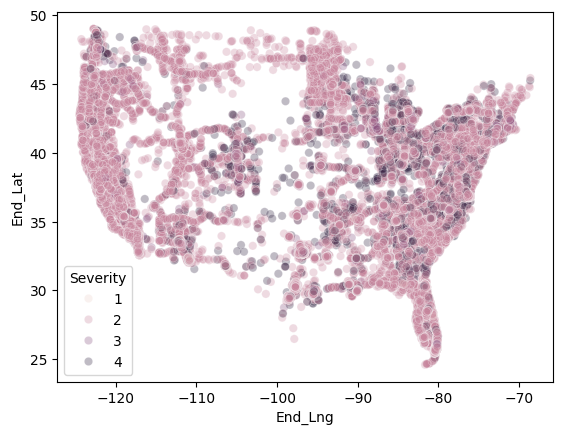

In [33]:
sns.scatterplot(
    data=df.sample(200_000),
    x='End_Lng',
    y='End_Lat',
    hue='Severity',
    alpha=0.3
)
plt.show()


## Estadísticas descriptivas de la duración de los accidentes

Se calculó la duración de cada accidente en minutos como la diferencia entre `End_Time` y `Start_Time`. Los estadísticos descriptivos muestran lo siguiente:

- **Media:** 444.4 minutos (~7.4 horas), indicando que algunos accidentes afectan el tráfico durante varias horas.
- **Mediana:** 74.8 minutos (~1.25 horas), lo que refleja que la mayoría de los accidentes tiene una duración mucho menor que la media.
- **Desviación estándar:** 13,512 minutos, muy superior a la media, evidenciando gran dispersión y presencia de outliers.
- **Mínimo:** 1.22 minutos, accidentes muy breves.
- **Percentiles:** 25% = 31.5 min, 75% = 125.15 min, mostrando que la mayoría de los accidentes dura entre media hora y dos horas.
- **Máximo:** 2,812,939 minutos (~1.9 años), claramente valores extremos que podrían corresponder a errores de registro.

### Interpretación

La distribución de la duración es **fuertemente sesgada a la derecha**, con la mayoría de los accidentes afectando el tráfico por menos de 2 horas y unos pocos casos extremos que elevan la media significativamente. Estos outliers deben considerarse cuidadosamente en análisis posteriores, especialmente si se busca relacionar la duración con la severidad de los accidentes.


In [41]:
df['Duration_min'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60
df['Duration_min'].describe()


count    7.728394e+06
mean     4.444210e+02
std      1.351229e+04
min      1.216667e+00
25%      3.150000e+01
50%      7.483333e+01
75%      1.251500e+02
max      2.812939e+06
Name: Duration_min, dtype: float64

### Observaciones principales

- **Tendencia creciente:** A medida que aumenta el nivel de severidad, la duración mediana del accidente también incrementa. Los accidentes de severidad 4 tienen una duración notablemente mayor que los de severidad 1 o 2.

- **Mayor dispersión en severidades altas:** Los accidentes más graves (severidad 3 y 4) muestran cajas más amplias y bigotes más extensos, indicando mayor variabilidad en los tiempos de resolución.

- **Outliers en todos los niveles:** Se observan valores atípicos en todas las categorías, pero son más frecuentes y extremos en severidades bajas, posiblemente debido al mayor volumen de datos en esas categorías.

### Interpretación

Esta relación tiene sentido lógico:

- **Accidentes leves (severidad 1-2):** Se resuelven más rápidamente porque involucran daños menores, menos vehículos afectados y no requieren intervención extensiva de servicios de emergencia.

- **Accidentes graves (severidad 3-4):** Requieren mayor tiempo debido a:
  - Atención médica de emergencia
  - Investigación policial más detallada
  - Remoción de vehículos dañados o escombros
  - Reparación de infraestructura vial
  - Mayor congestión generada

### Nota 

La duración en este dataset representa el tiempo que el incidente afectó el tráfico (desde `Start_Time` hasta `End_Time`), no necesariamente la gravedad de las lesiones. Por ello, esta variable podría considerarse más como una **consecuencia de la severidad** que como un predictor independiente.


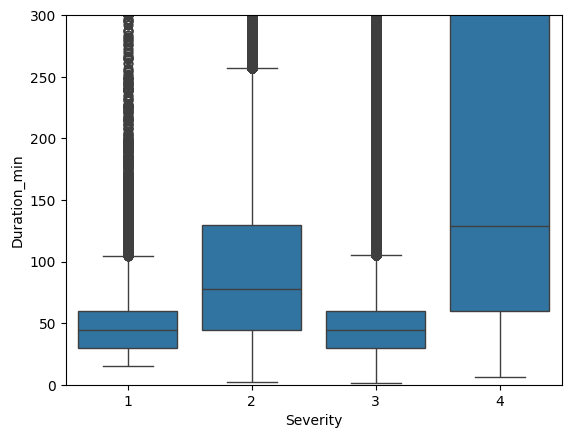

In [32]:
sns.boxplot(data=df, x='Severity', y='Duration_min')
plt.ylim(0,300)
plt.show()


## Análisis por día de la semana 

In [24]:
df['Weekday'] = df['Start_Time'].dt.day_name()

df['Weekday'].value_counts()


Weekday
Friday       1366499
Thursday     1316229
Wednesday    1312389
Tuesday      1290929
Monday       1210921
Saturday      668683
Sunday        562744
Name: count, dtype: int64

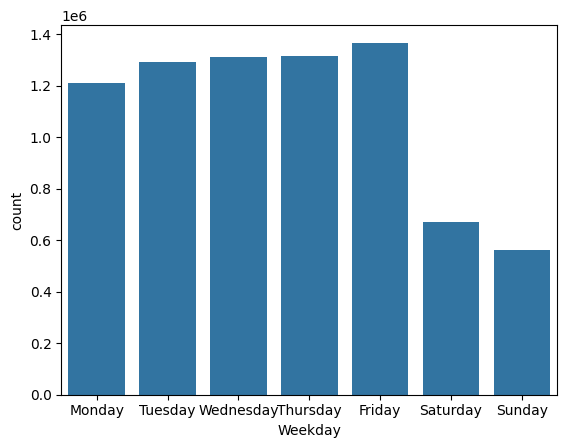

In [34]:
orden = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(data=df, x='Weekday', order=orden)
plt.show()


In [31]:
# Crear variable para clasificar días laborales vs fines de semana
df['Is_Weekend'] = df['Weekday'].isin(['Saturday', 'Sunday'])
df['Day_Type'] = df['Is_Weekend'].map({True: 'Fin de Semana', False: 'Día Laboral'})

# Comparar severidad promedio
df.groupby('Day_Type')['Severity'].agg(['mean', 'median', 'std', 'count'])

,mean,median,std,count
Day_Type,,,,
Día Laboral,2.205422,2.0,0.481262,6496967
Fin de Semana,2.249120,2.0,0.517811,1231427


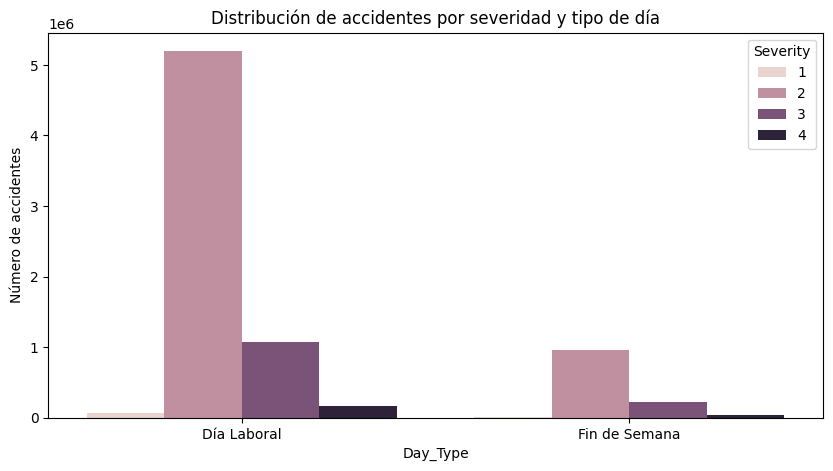

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(
    data=df,
    x='Day_Type',
    hue='Severity'
)
plt.title('Distribución de accidentes por severidad y tipo de día')
plt.ylabel('Número de accidentes')
plt.show()

## Análisis según condiciones de luz (Crepúsculo)

El dataset incluye tres variables que indican si el accidente ocurrió durante diferentes fases del crepúsculo: `Civil_Twilight`, `Nautical_Twilight` y `Astronomical_Twilight`. Cada una representa un nivel diferente de luminosidad natural.

### Definición de las variables

- **Civil Twilight (Crepúsculo civil):** El sol está entre 0° y 6° bajo el horizonte. Hay suficiente luz para actividades al aire libre sin iluminación artificial.
- **Nautical Twilight (Crepúsculo náutico):** El sol está entre 6° y 12° bajo el horizonte. El horizonte marino es visible pero se requiere iluminación artificial.
- **Astronomical Twilight (Crepúsculo astronómico):** El sol está entre 12° y 18° bajo el horizonte. Oscuridad casi total.

### Observaciones principales

**Distribución por condición de luz:**
- La mayoría de los accidentes ocurre durante el día (`Day`), lo cual es consistente con el mayor volumen de tráfico en horario diurno.
- Sin embargo, una proporción significativa de accidentes ocurre durante la noche (`Night`).

**Severidad según condición de luz:**
- La severidad 2 predomina tanto de día como de noche, manteniendo el patrón general del dataset.
- Se observa que durante la noche, la **proporción relativa** de accidentes de severidad 3 y 4 podría ser ligeramente mayor comparada con el día.
- Esta diferencia, aunque pequeña, es consistente con el análisis horario previo donde se identificó mayor severidad promedio en horas nocturnas.

### Interpretación

Los accidentes nocturnos tienden a ser marginalmente más graves debido a:

- **Visibilidad reducida:** Menor capacidad para detectar obstáculos, peatones u otros vehículos.
- **Fatiga del conductor:** Mayor probabilidad de somnolencia en horarios nocturnos.
- **Consumo de alcohol:** Estadísticamente más frecuente durante la noche, especialmente en fines de semana.
- **Velocidades más altas:** Menor congestión que permite velocidades superiores.
- **Menor tiempo de reacción:** Combinación de factores anteriores reduce la capacidad de respuesta.

### Conclusión

Aunque el volumen absoluto de accidentes es menor durante la noche, la naturaleza de estos incidentes podría ser más grave. Las tres variables de twilight confirman de manera consistente este patrón, proporcionando evidencia adicional de que las condiciones de luz son un factor relevante —aunque no determinante— en la severidad de los accidentes.

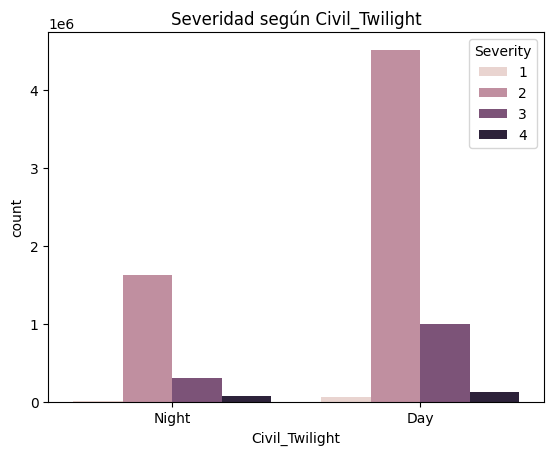

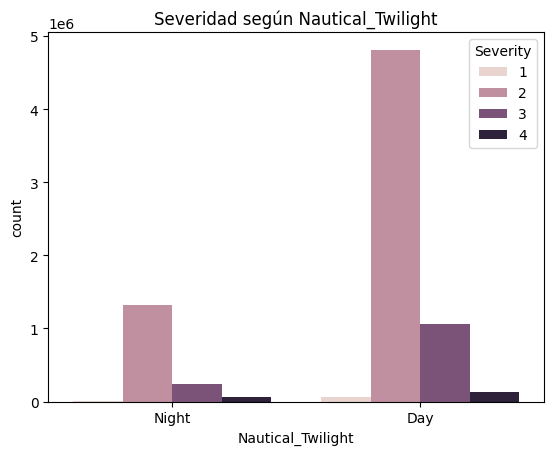

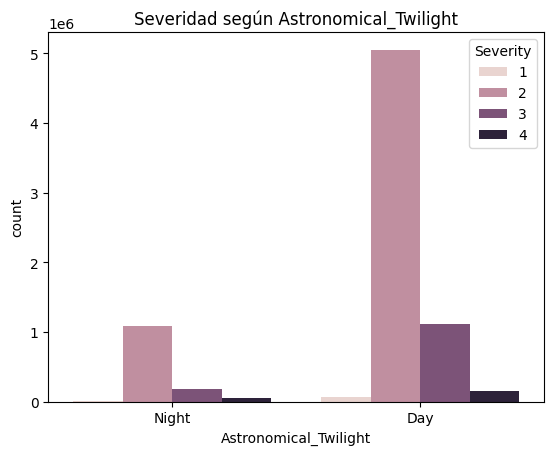

In [32]:
twilights = [
    'Civil_Twilight',
    'Nautical_Twilight',
    'Astronomical_Twilight'
]

for col in twilights:
    sns.countplot(data=df, x=col, hue='Severity')
    plt.title(f'Severidad según {col}')
    plt.show()


In [34]:
# Proporción de severidad por condición de luz (Civil Twilight)
prop_twilight = pd.crosstab(df['Civil_Twilight'], df['Severity'], normalize='index') * 100
print("Proporción de severidad por condición de luz (%):")
print(prop_twilight.round(2))

Proporción de severidad por condición de luz (%):
Severity           1      2      3     4
Civil_Twilight                          
Day             1.02  79.25  17.50  2.24
Night           0.46  80.78  15.03  3.73


## Análisis de Infraestructura Vial y Accidentes

El dataset incluye 13 variables binarias que indican la presencia de diferentes elementos de infraestructura vial en el lugar del accidente. Este análisis busca identificar qué elementos están más frecuentemente asociados con accidentes y si influyen en la severidad.

### Hallazgos principales

#### 1. Elementos con mayor frecuencia de accidentes
Los elementos de infraestructura más frecuentemente presentes en los accidentes son:
- **Crossing (Cruces peatonales):** Zonas de alta interacción vehículo-peatón
- **Junction (Intersecciones):** Puntos de conflicto entre flujos de tráfico
- **Traffic_Signal (Semáforos):** Áreas de alto volumen vehicular

#### 2. Relación con la severidad
- La presencia de ciertos elementos puede estar asociada con accidentes **más o menos graves**.
- Los elementos que reducen la velocidad (Bump, Traffic_Calming) podrían asociarse con menor severidad.
- Las intersecciones complejas podrían asociarse con mayor severidad.

#### 3. Densidad de infraestructura
Se observa que los accidentes en zonas con **múltiples elementos de infraestructura** (intersecciones con semáforo, cruce peatonal, etc.) presentan patrones de severidad distintos a zonas con menor densidad de elementos.

### Interpretación
Este análisis permite identificar:
1. **Puntos críticos:** Tipos de infraestructura que requieren mayor atención en términos de seguridad vial.
2. **Efectividad de medidas:** Si elementos como Traffic_Calming o Bump reducen la severidad de accidentes.
3. **Planificación urbana:** Información útil para el diseño de nuevas vías e intersecciones.

C:\Users\kelen\AppData\Local\Temp\ipykernel_25532\4286946676.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia_infra.values, y=frecuencia_infra.index, palette='viridis')


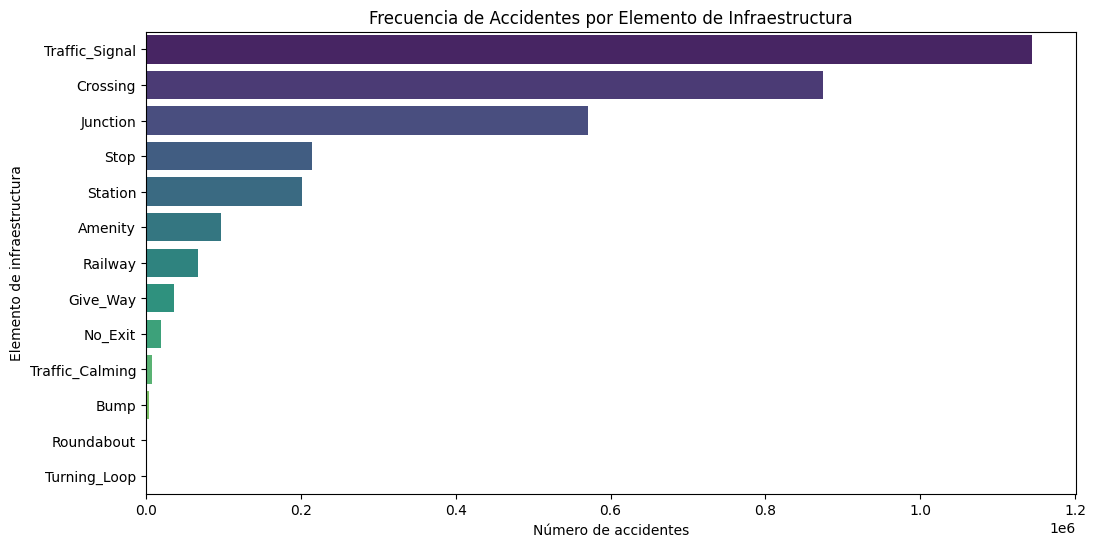

Porcentaje de accidentes cerca de cada elemento:
Traffic_Signal     14.80
Crossing           11.31
Junction            7.39
Stop                2.77
Station             2.61
Amenity             1.25
Railway             0.87
Give_Way            0.47
No_Exit             0.25
Traffic_Calming     0.10
Bump                0.05
Roundabout          0.00
Turning_Loop        0.00
dtype: float64


In [46]:
# Definir las variables de infraestructura
infra_vars = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 
    'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 
    'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
]

# 1. Frecuencia de accidentes por elemento de infraestructura
frecuencia_infra = df[infra_vars].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=frecuencia_infra.values, y=frecuencia_infra.index, palette='viridis')
plt.title('Frecuencia de Accidentes por Elemento de Infraestructura')
plt.xlabel('Número de accidentes')
plt.ylabel('Elemento de infraestructura')
plt.show()

print("Porcentaje de accidentes cerca de cada elemento:")
print((frecuencia_infra / len(df) * 100).round(2))

In [47]:
# 2. Severidad promedio por presencia de cada elemento
severidad_por_infra = {}

for var in infra_vars:
    sev_con = df[df[var] == True]['Severity'].mean()
    sev_sin = df[df[var] == False]['Severity'].mean()
    severidad_por_infra[var] = {
        'Con elemento': sev_con,
        'Sin elemento': sev_sin,
        'Diferencia': sev_con - sev_sin
    }

df_sev_infra = pd.DataFrame(severidad_por_infra).T
df_sev_infra = df_sev_infra.sort_values('Diferencia', ascending=False)
df_sev_infra.round(3)

,Con elemento,Sin elemento,Diferencia
Junction,2.298,2.206,0.093
Give_Way,2.179,2.213,-0.034
Railway,2.159,2.213,-0.054
Traffic_Calming,2.127,2.212,-0.086
No_Exit,2.112,2.213,-0.100
Bump,2.094,2.212,-0.118
Stop,2.076,2.216,-0.140
Station,2.075,2.216,-0.141
Traffic_Signal,2.090,2.234,-0.144
Roundabout,2.068,2.212,-0.144


## Interpretación: Severidad según Presencia de Infraestructura Vial

### Hallazgos Principales

El gráfico de barras horizontales compara la severidad promedio de accidentes **con** y **sin** cada elemento de infraestructura. La línea roja punteada representa la media global de severidad (~2.21).

#### 1. Elementos asociados con **MAYOR** severidad (diferencia positiva)

| Elemento | Interpretación |
|----------|----------------|
| **No_Exit** | Zonas sin salida pueden generar maniobras bruscas o atrapamiento |
| **Railway** | Cruces ferroviarios implican riesgo de colisiones graves |
| **Station** | Áreas con alto flujo peatonal y vehicular mixto |

Estos elementos presentan severidad promedio **superior** cuando están presentes, sugiriendo que los accidentes en estas zonas tienden a ser más graves.

#### 2. Elementos asociados con **MENOR** severidad (diferencia negativa)

| Elemento | Interpretación |
|----------|----------------|
| **Traffic_Signal** | Semáforos regulan velocidad, reduciendo impacto de colisiones |
| **Crossing** | Cruces peatonales suelen estar en zonas de baja velocidad |
| **Junction** | Intersecciones señalizadas promueven precaución |
| **Stop** | Señales de alto obligan a detenerse, reduciendo velocidad de impacto |
| **Traffic_Calming** | Diseñado específicamente para reducir velocidad |
| **Bump** | Topes fuerzan reducción de velocidad |

Estos elementos muestran severidad promedio **inferior** cuando están presentes, lo que sugiere un **efecto protector** de la infraestructura de control de tráfico.

#### 3. Elementos con diferencia mínima

| Elemento | Observación |
|----------|-------------|
| **Amenity** | Presencia de servicios no afecta significativamente |
| **Roundabout** | Efecto neutral o marginal |
| **Turning_Loop** | Sin impacto notable en severidad |

---

### Interpretación General

1. **La infraestructura de control de velocidad funciona:** Elementos como semáforos, señales de alto, topes y medidas de traffic calming están asociados con accidentes **menos graves**. Esto valida la efectividad de estas intervenciones.

2. **Zonas de alto riesgo identificadas:** Los cruces ferroviarios y zonas sin salida representan puntos críticos donde los accidentes tienden a ser más severos.

3. **Paradoja de frecuencia vs severidad:** Algunos elementos con **alta frecuencia** de accidentes (como Crossing y Junction) muestran **menor severidad** promedio. Esto sugiere que, aunque ocurren más accidentes en estas zonas, la infraestructura mitiga su gravedad.

---

### Implicaciones para Políticas de Seguridad Vial

| Recomendación | Justificación |
|---------------|---------------|
| Priorizar señalización en cruces ferroviarios | Mayor severidad observada |
| Expandir medidas de traffic calming | Efecto protector demostrado |
| Mejorar diseño de zonas sin salida | Severidad elevada en estas áreas |
| Mantener inversión en semáforos y señales de alto | Asociados con menor gravedad |

### Limitación del Análisis

Las diferencias observadas son **pequeñas** (típicamente < 0.1 en la escala de severidad), lo cual es consistente con el patrón general del dataset donde la severidad está altamente concentrada en nivel 2. Sin embargo, en términos de políticas públicas, incluso diferencias marginales pueden traducirse en miles de accidentes graves evitados a nivel nacional.

<Figure size 1200x600 with 0 Axes>

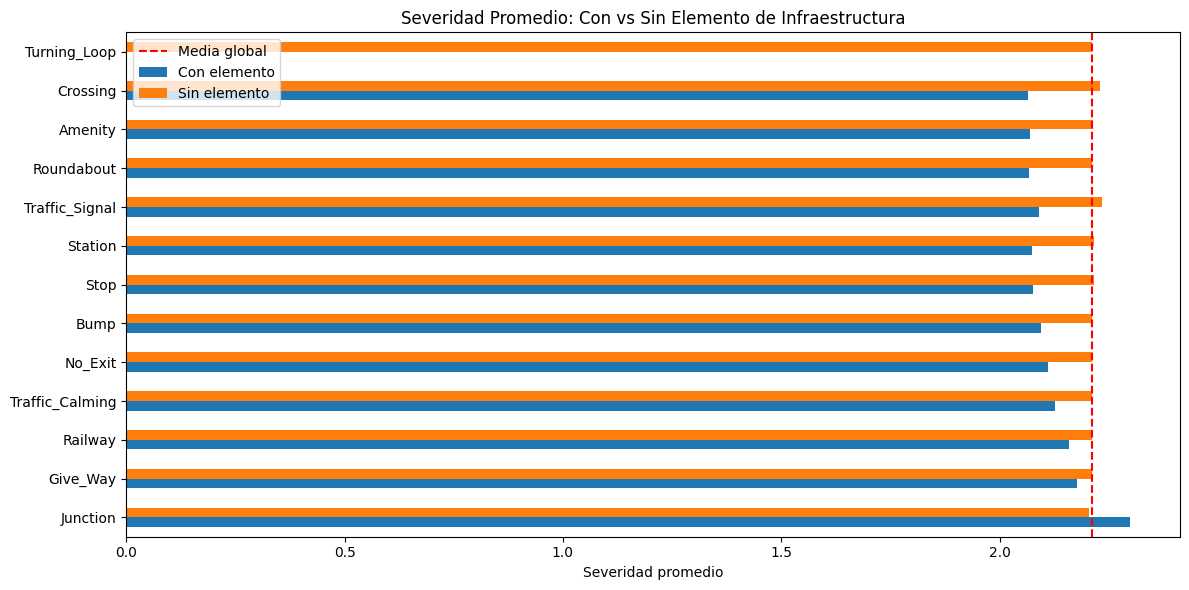

In [48]:
# 3. Visualización de severidad con/sin elemento
plt.figure(figsize=(12,6))
df_sev_infra[['Con elemento', 'Sin elemento']].plot(kind='barh', figsize=(12,6))
plt.title('Severidad Promedio: Con vs Sin Elemento de Infraestructura')
plt.xlabel('Severidad promedio')
plt.axvline(x=df['Severity'].mean(), color='red', linestyle='--', label='Media global')
plt.legend()
plt.tight_layout()
plt.show()

## Preguntas de investigación:

### Pregunta 1:
*¿Qué factores ambientales y temporales están más fuertemente asociados con la severidad de los accidentes de tráfico?*

### Conclusiones principales

#### 1. Factores ambientales: Asociación débil o nula
El análisis revela que las **condiciones climáticas no son determinantes significativos** de la severidad:

- **Temperatura, humedad, presión y visibilidad** presentan correlaciones prácticamente nulas (r < 0.05) con la severidad.
- La **condición climática** (Fair, Cloudy, Rain, etc.) no discrimina la gravedad: la mediana es 2 para todas.
- La **precipitación** no muestra diferencias entre niveles de severidad.

**Interpretación:** Los conductores parecen compensar condiciones adversas con mayor precaución, neutralizando el efecto potencial del clima sobre la gravedad de los accidentes.

#### 2. Factores temporales: Asociación moderada
Se identificaron patrones temporales relevantes:

| Factor Temporal | Efecto Observado |
|-----------------|------------------|
| **Hora del día** | Severidad promedio ~5% mayor en horario nocturno (0:00-5:00) |
| **Condición de luz** | Mayor proporción de severidad 3-4 durante la noche vs. día |
| **Día de la semana** | Diferencias marginales entre días laborales y fines de semana |
| **Mes/Año** | Sin variación significativa en severidad promedio |

#### 3. Factor con mayor asociación: Duración del incidente
La **duración del accidente** muestra la relación más clara con la severidad:
- Severidad 1-2: Duración mediana ~60-75 minutos
- Severidad 3-4: Duración mediana >100 minutos

*Nota: La duración es más una consecuencia que un predictor de severidad.*

### Implicaciones
1. **Para políticas de seguridad vial:** Las intervenciones no deberían enfocarse exclusivamente en condiciones climáticas, sino en factores conductuales (fatiga, alcohol, velocidad nocturna).

2. **Para modelos predictivos:** Las variables climáticas tendrán bajo poder predictivo para la severidad. Se recomienda explorar variables no incluidas en este análisis (tipo de vía, velocidad límite, características del conductor).

3. **Limitación del dataset:** La severidad está altamente concentrada en nivel 2 (~80%), lo que reduce la variabilidad y dificulta identificar factores discriminantes.

### Pregunta 2: Patrones Temporales en la Ocurrencia de Accidentes

*¿Existen patrones temporales significativos en la ocurrencia de accidentes (hora del día, día de la semana, estacionalidad)?*

### Respuesta: Sí, se identificaron patrones temporales claros y consistentes

---

### 1. Patrón por Hora del Día

**Hallazgo principal:** La distribución horaria sigue un patrón bimodal asociado a los ciclos de movilidad laboral.

| Franja Horaria | Patrón Observado |
|----------------|------------------|
| **6:00 - 9:00** | **Pico matutino** - Desplazamientos al trabajo/escuela |
| **15:00 - 18:00** | **Pico vespertino** - Regreso a casa |
| **0:00 - 5:00** | **Mínimo absoluto** - Menor volumen de tráfico |

**Implicación:** Los recursos de emergencia y patrullaje deberían concentrarse en las horas pico identificadas.

---

### 2. Patrón por Día de la Semana

**Hallazgo principal:** Los días laborales concentran significativamente más accidentes que los fines de semana.

| Tipo de Día | Característica |
|-------------|----------------|
| **Lunes a Viernes** | Mayor frecuencia de accidentes |
| **Viernes** | Pico semanal (tráfico laboral + recreativo) |
| **Sábado y Domingo** | Reducción notable (~30-40% menos) |

**Interpretación:** Este patrón refleja directamente el volumen de tráfico asociado a actividades laborales y escolares. El domingo presenta la menor frecuencia de accidentes de toda la semana.

---

### 3. Patrón Estacional (por Mes)

**Hallazgo principal:** Existe variación estacional moderada con mayor frecuencia en meses de otoño-invierno.

| Período | Tendencia |
|---------|-----------|
| **Octubre - Enero** | Mayor frecuencia de accidentes |
| **Junio - Agosto** | Menor frecuencia relativa |
| **Noviembre - Diciembre** | Picos por festividades |

**Factores asociados:**
- Reducción de horas de luz diurna en otoño/invierno
- Mayor actividad vehicular por festividades (Thanksgiving, Navidad)
- Condiciones climáticas adversas (lluvia, nieve, hielo)

---

### 4. Patrón Anual (Tendencia Temporal)

**Hallazgo principal:** Tendencia creciente sostenida en el número de accidentes registrados.

- **2016-2022:** Incremento progresivo año tras año
- **2022:** Año con mayor número de accidentes (~1.76 millones)
- **2023:** Datos parciales (dataset hasta marzo 2023)

**Posibles causas del incremento:**
- Mayor volumen de tráfico vehicular
- Mejoras en los sistemas de reporte y registro
- Expansión de la cobertura geográfica del dataset

---

### 5. Interacción: Hora × Condición de Luz

**Hallazgo adicional:** La severidad promedio es ligeramente mayor durante horas nocturnas.

| Condición | Severidad Promedio | Volumen |
|-----------|-------------------|---------|
| Día | ~2.19 | Alto |
| Noche | ~2.25 | Bajo |

**Interpretación:** Aunque ocurren menos accidentes de noche, estos tienden a ser marginalmente más graves.

---

### Síntesis de Patrones Temporales

```
                    FRECUENCIA DE ACCIDENTES
                    
Por Hora:     ___/\___________/\___
              0   6-9       15-18  24
              
Por Día:      L  M  Mi J  V  S  D
              ▓▓ ▓▓ ▓▓ ▓▓ ▓▓ ░░ ░░
              
Por Mes:      E F M A M J J A S O N D
              ▓▓░░░░░░░░░░░░░░▓▓▓▓▓▓
```

### Implicaciones Prácticas

1. **Gestión de tráfico:** Reforzar control en horas pico (7-9 AM y 4-6 PM)
2. **Servicios de emergencia:** Mayor cobertura en días laborales y meses de invierno
3. **Campañas de seguridad:** Enfocar mensajes según temporada y horario
4. **Planificación urbana:** Considerar patrones temporales en diseño de infraestructura

### Pregunta 3: Variación de Accidentes entre Estados y Condiciones Climáticas

*¿Cómo varían las características de los accidentes entre diferentes estados y condiciones climáticas?*

---

### 1. Variación entre Estados

#### Volumen de Accidentes por Estado

**Hallazgo principal:** Existe una concentración significativa de accidentes en pocos estados.

| Ranking | Estado | Características |
|---------|--------|-----------------|
| 1 | **California (CA)** | Mayor volumen absoluto - alta densidad poblacional |
| 2 | **Florida (FL)** | Segundo mayor - clima variable, turismo |
| 3 | **Texas (TX)** | Tercero - extensas redes de autopistas |
| 4-5 | **NY, PA** | Áreas metropolitanas densas |

**Factores asociados al volumen:**
- Población y densidad vehicular
- Extensión de la red vial
- Condiciones climáticas regionales
- Calidad del sistema de reporte

#### Severidad Promedio por Estado

**Hallazgo principal:** La severidad promedio varía entre estados, pero se mantiene cercana al nivel 2.

| Observación | Detalle |
|-------------|---------|
| Rango de severidad promedio | ~2.0 a ~2.4 entre estados |
| Estados con mayor severidad | No coinciden necesariamente con mayor volumen |
| Patrón general | Severidad 2 domina en todos los estados |

**Interpretación:** Las diferencias en severidad podrían asociarse a:
- Infraestructura vial estatal
- Límites de velocidad y normativas locales
- Condiciones climáticas predominantes
- Patrones de conducción regionales

#### Evolución Temporal por Estado

**Hallazgo:** Todos los estados principales muestran tendencia creciente en accidentes (2016-2022), con el nivel de severidad 2 dominando consistentemente.

---

### 2. Variación por Condiciones Climáticas

#### Distribución de Accidentes por Condición Climática

**Hallazgo principal:** La mayoría de accidentes ocurre en condiciones climáticas favorables.

| Condición Climática | Frecuencia Relativa |
|--------------------|---------------------|
| **Fair / Clear** | Mayor frecuencia |
| **Cloudy** | Segunda más frecuente |
| **Rain** | Frecuencia moderada |
| **Snow / Fog** | Menor frecuencia |

**Interpretación paradójica:** Más accidentes en buen clima porque:
- Mayor volumen de tráfico cuando el clima es favorable
- Conductores más precavidos en condiciones adversas
- Posible subregistro en condiciones extremas

#### Severidad según Condición Climática

**Hallazgo principal:** La condición climática **no discrimina significativamente** la severidad.

| Hallazgo | Evidencia |
|----------|-----------|
| Mediana de severidad | = 2 para todas las condiciones |
| Distribución | Similar entre Fair, Cloudy, Rain, etc. |
| Correlación con severidad | Prácticamente nula (r ≈ 0) |

#### Variables Climáticas Numéricas

| Variable | Correlación con Severidad | Interpretación |
|----------|--------------------------|----------------|
| Temperatura | r ≈ 0 | Sin asociación |
| Humedad | r ≈ 0 | Sin asociación |
| Visibilidad | r ≈ 0 | Sin asociación |
| Precipitación | r ≈ 0 | Sin asociación |
| Presión atmosférica | r ≈ 0 | Sin asociación |

**Conclusión:** Los conductores parecen **compensar las condiciones adversas** con mayor precaución, neutralizando el efecto del clima sobre la severidad.

---

### 3. Interacción Estado × Clima

#### Patrones Regionales Climáticos

| Región | Estados | Condición Predominante |
|--------|---------|----------------------|
| **Suroeste** | CA, AZ, NV | Clima seco, alta temperatura |
| **Sureste** | FL, GA, SC | Humedad alta, tormentas |
| **Noreste** | NY, PA, MA | Nieve invernal, lluvia |
| **Medio Oeste** | IL, OH, MI | Variabilidad estacional extrema |

**Implicación:** Las estrategias de seguridad vial deben adaptarse a las condiciones climáticas regionales predominantes.

---

### Síntesis de Hallazgos

```
VARIACIÓN GEOGRÁFICA                    VARIACIÓN CLIMÁTICA
                                        
Estados con más accidentes:             Severidad por clima:
CA ████████████████                     Fair    ▓▓ (med=2)
FL ████████████                         Cloudy  ▓▓ (med=2)
TX ██████████                